# Ehsan Shaghaei
AAI-01

Click for full version of notebook. [Colab Link](https://colab.research.google.com/drive/1tw9blQTMyJqfo8pfwhf9WLLK019-YHJ7?usp=sharing)

In [46]:
from scipy.integrate import odeint
import numpy as np

# Task 1
Simulate the response of the following system:
$$v˙ + |v|v = u$$
Assume that we apply a unit step input in thrust $u$, followed 5 seconds later by a negative unit
step input. Repeat with increasing the input u 10 times. Compare the results with linear
system:
$$v˙ + v = u$$


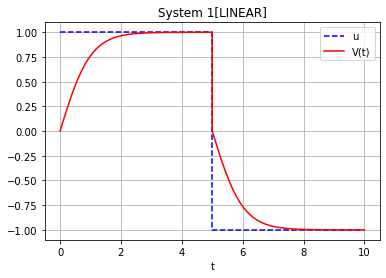

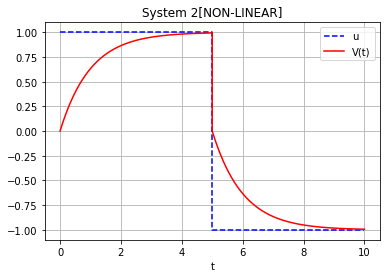

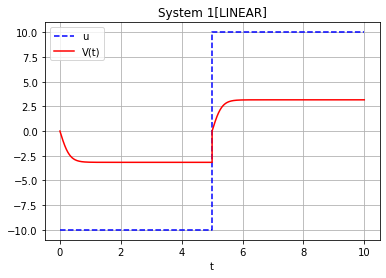

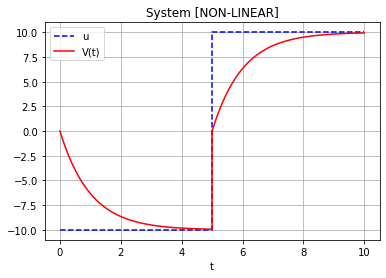

In [47]:
TIME = 10
SAMPLES=1000

t_1 = np.linspace(0, TIME//2, SAMPLES//2)
t_2 = np.linspace(TIME//2, TIME, SAMPLES//2)
t = np.concatenate((t_1,t_2))
U_1,U_2 = 1,-1

v0=0

# system 1
def dvdt(v,t,u):
  dv = u - np.abs(v)*v
  return dv

# solution
v = np.concatenate((odeint(dvdt,v0,t_1,args=(U_1,)), odeint(dvdt,v0,t_2,args=(U_2,))))
# plotting the result
import matplotlib.pyplot as plt

plt.plot(t, [U_1]*(SAMPLES//2)+[U_2]*(SAMPLES//2), 'b--',label='u')
plt.plot(t, v, 'r',label='V(t)')
plt.legend(loc='best')
plt.title('System 1[LINEAR]')
plt.xlabel('t')
plt.grid()
plt.show()

# system 2
def dvdt(v,t,u):
  dv = u - v
  return dv

# solution
v = np.concatenate((odeint(dvdt,v0,t_1,args=(U_1,)), odeint(dvdt,v0,t_2,args=(U_2,))))
# plotting the result
import matplotlib.pyplot as plt

plt.plot(t, [U_1]*(SAMPLES//2)+[U_2]*(SAMPLES//2), 'b--',label='u')
plt.plot(t, v, 'r',label='V(t)')
plt.legend(loc='best')
plt.title('System 2[NON-LINEAR]')
plt.xlabel('t')
plt.grid()
plt.show()

# 10 TIMES U
U_1,U_2 = -10,10

# system 1
def dvdt(v,t,u):
  dv = u - np.abs(v)*v
  return dv

# solution
v = np.concatenate((odeint(dvdt,v0,t_1,args=(U_1,)), odeint(dvdt,v0,t_2,args=(U_2,))))
# plotting the result
import matplotlib.pyplot as plt

plt.plot(t, [U_1]*(SAMPLES//2)+[U_2]*(SAMPLES//2), 'b--',label='u')
plt.plot(t, v, 'r',label='V(t)')
plt.legend(loc='best')
plt.title('System 1[LINEAR]')
plt.xlabel('t')
plt.grid()
plt.show()

# system 2
def dvdt(v,t,u):
  dv = u - v
  return dv

# solution
v = np.concatenate((odeint(dvdt,v0,t_1,args=(U_1,)), odeint(dvdt,v0,t_2,args=(U_2,))))
# plotting the result
import matplotlib.pyplot as plt

plt.plot(t, [U_1]*(SAMPLES//2)+[U_2]*(SAMPLES//2), 'b--',label='u')
plt.plot(t, v, 'r',label='V(t)')
plt.legend(loc='best')
plt.title('System [NON-LINEAR]')
plt.xlabel('t')
plt.grid()
plt.show()



As we see linear system behaves linearly to the input U unlike the non-linear system 

# Task 2
Simulate the response of:
$$x˙ = x − x^3$$
from initial points $x_0 = −1.5, −1, −0.5, 0, 0.5, 1, 1.5$.
Plot the result on one graph and discuss the behavior for each initial condition.

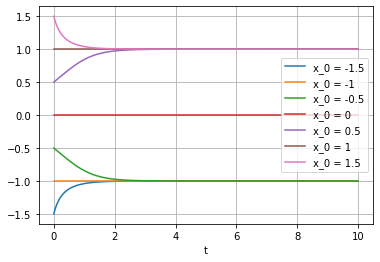

In [48]:
TIME = 10
SAMPLES=1000

t = np.linspace(0, TIME, SAMPLES)

init_list=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5]

# system
def dxdt(x,t):
  dx = x - x**3
  return dx


# plotting the solution
import matplotlib.pyplot as plt

for init in init_list:
  plt.plot(t, odeint(dxdt,init,t),label=f'x_0 = {init}')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


$$∀ x_0 < 0; x_0 ∈ R; lim_{t⇁∞}x(t)=-1 $$
$$∀ x_0 = 0; x_0 ∈ R; lim_{t⇁∞}x(t)=0 $$
$$∀ x_0 > 0; x_0 ∈ R; lim_{t⇁∞}x(t)=1 $$

# Task 3
Simulate the response of Lotka-Volterra equations: $$\begin{cases} \dot x = \alpha x - \beta xy \\ \dot y = δxy - γy \end{cases}$$
S.T. $$α = \frac{2}{3}, β = \frac{4}{3}, δ =1,  γ = 1$$

With initial conditions: $$x_0 = [0.9, 1.8], y_0 = [0.9, 1.8]$$

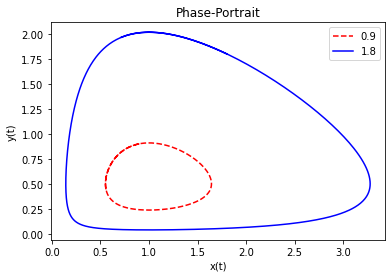

In [49]:
SAMPLES = 1000
alpha = 2/3
beta = 4/3
delta = 1
gamma = 1
x_0 = np.array([0.9, 1.8])
y_0 = np.array([0.9, 1.8])
t = np.linspace(0,10,SAMPLES)

def lv_eq(X,t,alpha,beta,delta,gamma):
  x,y=X
  dx = alpha*x - beta*x*y
  dy = delta*x*y - gamma*y
  return[dx,dy]

sol = [odeint(lv_eq, (x_0[0], y_0[0]), t,args=(alpha,beta,delta,gamma)),\
  odeint(lv_eq, (x_0[1], y_0[1]), t,args=(alpha,beta,delta,gamma))]

plt.plot(sol[0][:,0], sol[0][:,-1],'r--', label = '0.9')
plt.plot(sol[1][:,0], sol[1][:,-1],'b', label = '1.8')
plt.title('Phase-Portrait')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend(loc='best')
plt.show()


**Does the resulting trajectory represent the limit cycle?** As we see different initial conditions result in different trajectories with different radius, this trajectories does not represent a limit-cycle.

# Task 4
You may face chaos even in familiar mechanical systems as double pendulum.
To check this, simulate the responses of the double pendulum nearby initial conditions around
$$θ1 = π/2, θ2 = π/2$$ and compare the resulting cartesian trajectories.
$$\left\{ {\begin{array}{*{20}{l}}
{\left( {{m_1} + {m_2}} \right){l_1}{{\ddot \alpha }_1} + {m_2}{l_2}{{\ddot \alpha }_2}\cos \left( {{\alpha _1} - {\alpha _2}} \right) + {m_2}{l_2}\dot \alpha _2^2\sin \left( {{\alpha _1} - {\alpha _2}} \right) + \left( {{m_1} + {m_2}} \right)g\sin {\alpha _1} = 0}\\[0.4em]
{{l_2}{{\ddot \alpha }_2} + {l_1}{{\ddot \alpha }_1}\cos \left( {{\alpha _1} - {\alpha _2}} \right) - {l_1}\dot \alpha _1^2\sin \left( {{\alpha _1} - {\alpha _2}} \right) + g\sin {\alpha _2} = 0}
\end{array}.} \right .$$

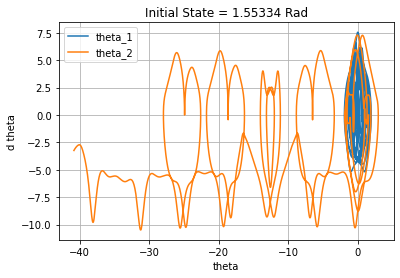

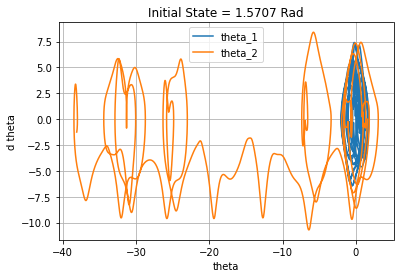

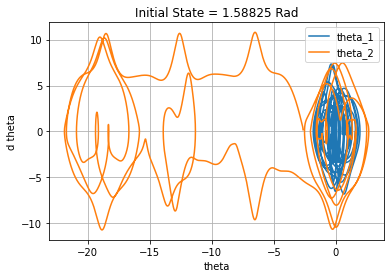

In [50]:
SAMPLES=1000
g = 9.81
t = np.linspace(0,30,6*SAMPLES)
m1,m2,l1,l2 = 1,1,1,1
inits = [1.55334, 1.5707, 1.58825]

# https://math24.net/double-pendulum.html 
def system(X, t, m1,m2,l1,l2):
  p1,dp1,p2,dp2 = X
  cos, sin = np.cos(p1-p2), np.sin(p1-p2)
  ddp1 = ( m2*g*np.sin(p2)*cos - m2*sin*(l1*dp1**2*cos + l2*dp2**2)-(m1+m2)*g*np.sin(p1) ) / (l1*(m1 + m2*sin**2))
  ddp2 = ( (m1+m2)*(l1*dp1**2*sin - g*np.sin(p2) + g*np.sin(p1)*cos) + m2*l2*dp2**2*sin*cos ) / (l2*(m1 + m2*sin**2))
  return [dp1, ddp1, dp2, ddp2]

for i,init in enumerate(inits):
  y12 = [init, 0, init, 0] 
  sol = odeint(system, y12, t, args=(m1,m2,l1,l2))
  
  title = 'Initial State = ' + str(init) + ' Rad'
  plt.plot(sol[:,0], sol[:,1], label='theta_1')
  plt.plot(sol[:,2], sol[:,3], label='theta_2')
  plt.title(title)
  plt.grid('best')
  plt.xlabel('theta')
  plt.ylabel('d theta')
  plt.legend()
  plt.show()

It seems to me the deviation of the initial state from $π/2$ resulted in lower range of oscilation of $dθ$ and increment of theta resulted in higher mean-squared value of $θ$ values. I don't feel good about my conclusion, I would appriciate a feedback on my understanding.